<a href="https://colab.research.google.com/github/ricardoV94/mbmlbook/blob/master/MBML_Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import theano.tensor as tt
#!pip install arviz

In [0]:
import logging
logger = logging.getLogger('pymc3')
logger.propagate = False
logger.setLevel(logging.ERROR)

---

## 1.2 A model of a murder

In [0]:
auburn = True
grey = False
dagger = True
gun = False

with pm.Model() as model:
    # True: Auburn, False: Grey, 
    murder = pm.Bernoulli('murder', 0.7)

    # Weapon is conditional on murderer
    # True: Gun, False: Revolver
    murder_weapon = pm.math.switch(murder, .8, .1)
    weapon = pm.Bernoulli('weapon', murder_weapon)

    trace = pm.sample(5000, progressbar=False)

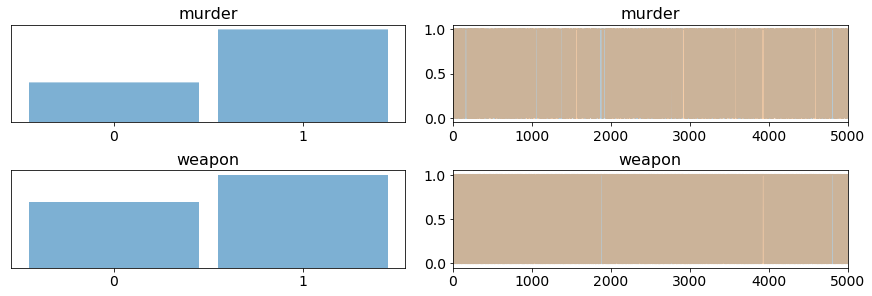

In [4]:
pm.traceplot(trace);

We can retrieve the prior probabilities from the join probability distribution (sampled on the trace)

In [5]:
print('Marginal Probability of Murderer (directly imputed) \n')
print('P(Auburn) =', np.mean((trace['murder']==auburn)))
print('P(Grey)   =', np.mean((trace['murder']==grey)))

Marginal Probability of Murderer (directly imputed) 

P(Auburn) = 0.6991
P(Grey)   = 0.3009


In [6]:
print('Conditional Probability of Weapon, given Murderer (directly imputed) \n')
print('P(Dagger | Auburn) =', np.mean(trace['weapon'][trace['murder']==auburn]==dagger))
print('P(Gun    | Auburn) =', np.mean(trace['weapon'][trace['murder']==auburn]==gun))
print('P(Dagger | Grey)   =', np.mean(trace['weapon'][trace['murder']==grey]==dagger))
print('P(Gun    | Grey)   =', np.mean(trace['weapon'][trace['murder']==grey]==gun))


Conditional Probability of Weapon, given Murderer (directly imputed) 

P(Dagger | Auburn) = 0.7968817050493492
P(Gun    | Auburn) = 0.20311829495065084
P(Dagger | Grey)   = 0.09571286141575275
P(Gun    | Grey)   = 0.9042871385842473



The distribution contains additional information that was not directly imputed, but which is determined by the model structure

In [7]:
print('Joint Probability of Murderer and Weapon \n')

print('P(Auburn, Dagger) =', np.mean((trace['murder']==1) & (trace['weapon']==1)))
print('P(Auburn, Gun)    =', np.mean((trace['murder']==1) & (trace['weapon']==0)))
print('P(Grey,   Dagger) =', np.mean((trace['murder']==0) & (trace['weapon']==1)))
print('P(Grey,   Gun)    =', np.mean((trace['murder']==0) & (trace['weapon']==0)))

Joint Probability of Murderer and Weapon 

P(Auburn, Dagger) = 0.5571
P(Auburn, Gun)    = 0.142
P(Grey,   Dagger) = 0.0288
P(Grey,   Gun)    = 0.2721


In [8]:
print('Marginal Probability of Weapon (not discussed in the book) \n')
print('P(Dagger) =', np.mean((trace['weapon']==dagger)))
print('P(Gun)    =', np.mean((trace['weapon']==gun)))

Marginal Probability of Weapon (not discussed in the book) 

P(Dagger) = 0.5859
P(Gun)    = 0.4141



Similarly, we can use the joint probability distribution to infer changes in belief when observing one of the weapons

In [9]:
print('Conditional Probability of Murderer, given Weapon \n')

print('(Book example)')
print('P(Auburn | Gun)    =', np.mean(trace['murder'][trace['weapon']==gun]==auburn))
print('P(Grey   | Gun)    =', np.mean(trace['murder'][trace['weapon']==gun]==grey))

print('\n(Not shown in the book)')
print('P(Auburn | Dagger) =', np.mean(trace['murder'][trace['weapon']==dagger]==auburn))
print('P(Grey   | Dagger) =', np.mean(trace['murder'][trace['weapon']==dagger]==grey))

Conditional Probability of Murderer, given Weapon 

(Book example)
P(Auburn | Gun)    = 0.3429123400144893
P(Grey   | Gun)    = 0.6570876599855108

(Not shown in the book)
P(Auburn | Dagger) = 0.9508448540706606
P(Grey   | Dagger) = 0.04915514592933948




---

## 1.3 Working with larger models 

Better yet, we can run the original model conditioned on the observed weapon, and sample the posterior distribution directly

In [0]:
with pm.Model() as model: 
    murder = pm.Bernoulli('murder', 0.7)
    
    murder_weapon = pm.math.switch(murder, .8, .1)
    
    # Conditioned on observed weapon
    weapon = pm.Bernoulli('weapon', murder_weapon, observed=gun)

    trace2 = pm.sample(5000, progressbar=False)

In [11]:
print('Conditional Probability of Murderer, given Gun \n')
print('P(Auburn | Gun) =', np.mean(trace2['murder']==auburn))
print('P(Grey   | Gun) =', np.mean(trace2['murder']==grey))

Conditional Probability of Murderer, given Gun 

P(Auburn | Gun) = 0.3412
P(Grey   | Gun) = 0.6588




---

## 1.4 Extending the model 

In [0]:
auburn = True
grey = False
dagger = True
gun = False
hair_present = True
hair_absent = False

with pm.Model() as model:
    murder = pm.Bernoulli('murder', 0.7)
    
    murder_weapon = pm.math.switch(murder, .8, .1)
    weapon = pm.Bernoulli('weapon', murder_weapon, observed=gun)
    
    # Grey hair is conditional on murderer
    # True: Hair present, False: Hair absent
    grey_hair = pm.math.switch(murder, .05, .5)  
    
    # Conditioned on hair being present
    hair = pm.Bernoulli('hair', grey_hair, observed=hair_present)

    trace3 = pm.sample(5000, progressbar=False)

In [13]:
print('Conditional Probability of Murderer, given Gun and Grey hair \n')
print('P(Auburn | Gun, Hair) =', np.mean(trace3['murder']==auburn))
print('P(Grey   | Gun, Hair) =', np.mean(trace3['murder']==grey))

Conditional Probability of Murderer, given Gun and Grey hair 

P(Auburn | Gun, Hair) = 0.053
P(Grey   | Gun, Hair) = 0.947
